In [1]:
%pip install seaborn

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [6]:
import time
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

plt.style.use('ggplot')

In [7]:
df=pd.read_csv('./DBMS-Performance-Monitor-Log.csv',\
               sep='\t',decimal=',')
df.head()

,CPU,Disk 1,Disk 2,TR ID
0,116.824,9,9,18
1,64.383,7,9,37
2,35.403,7,9,58
3,104.409,8,12,77
4,119.793,9,8,19


In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CPU     200 non-null    float64
 1   Disk 1  200 non-null    int64  
 2   Disk 2  200 non-null    int64  
 3   TR ID   200 non-null    int64  
dtypes: float64(1), int64(3)
memory usage: 6.4 KB


In [ ]:
dt=df.describe()
dt=dt[['CPU','Disk 1','Disk 2']]
dt

,CPU,Disk 1,Disk 2
count,200.000000,200.000000,200.00000
mean,238.204106,51.375000,44.84500
std,165.862629,26.994777,26.42142
min,23.597000,5.000000,7.00000
25%,104.439522,33.000000,26.25000
50%,151.624667,63.000000,39.00000
75%,418.051750,72.000000,68.00000
max,507.450000,85.000000,92.00000


In [9]:
dt=df.describe()
dt=dt[['CPU','Disk 1','Disk 2']]
dt

,CPU,Disk 1,Disk 2
count,200.000000,200.000000,200.00000
mean,238.204106,51.375000,44.84500
std,165.862629,26.994777,26.42142
min,23.597000,5.000000,7.00000
25%,104.439522,33.000000,26.25000
50%,151.624667,63.000000,39.00000
75%,418.051750,72.000000,68.00000
max,507.450000,85.000000,92.00000


In [10]:
dt.loc['cv']=dt.loc['std'].values/dt.loc['mean'].values
dt.round(2)  #.to_latex()

,CPU,Disk 1,Disk 2
count,200.00,200.00,200.00
mean,238.20,51.38,44.84
std,165.86,26.99,26.42
min,23.60,5.00,7.00
25%,104.44,33.00,26.25
50%,151.62,63.00,39.00
75%,418.05,72.00,68.00
max,507.45,85.00,92.00
cv,0.70,0.53,0.59


<Axes: >

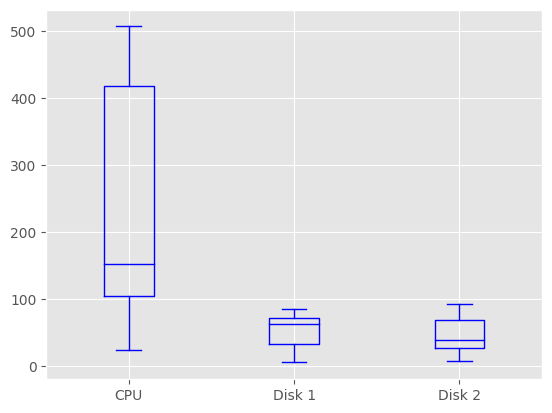

In [ ]:
df[['CPU','Disk 1','Disk 2']].boxplot(color='blue')

array([[<Axes: title={'center': 'CPU'}>,
        <Axes: title={'center': 'Disk 1'}>],
       [<Axes: title={'center': 'Disk 2'}>, <Axes: >]], dtype=object)

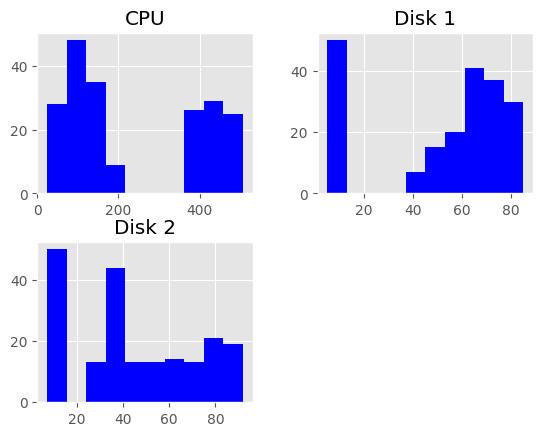

In [11]:
df[['CPU','Disk 1','Disk 2']].hist(color='blue')


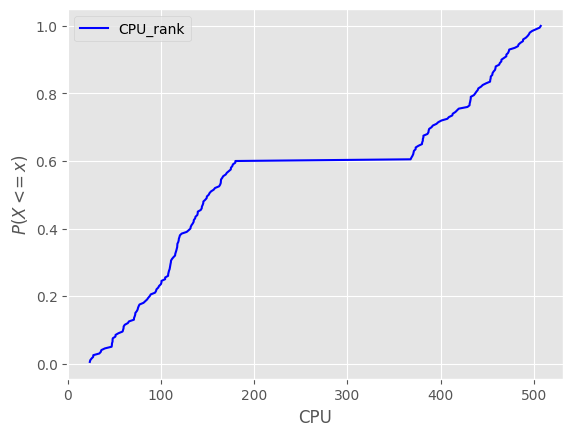

In [12]:
df['CPU_rank'] = df['CPU'].rank(method = 'average', pct = True)
df.sort_values('CPU').plot(x = 'CPU', y = 'CPU_rank', grid = True, 
                           color='blue')
plt.ylabel(r"$P(X <\!\!= x)$")
plt.draw()

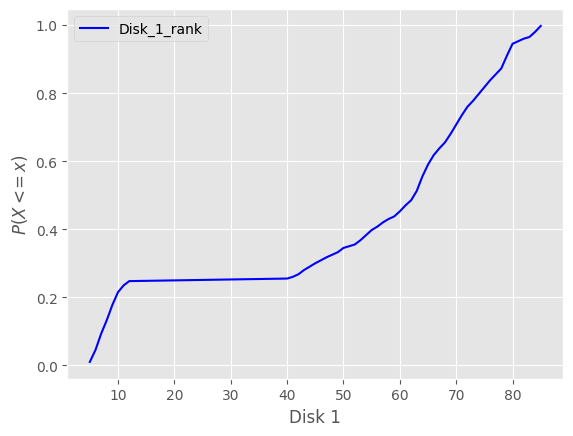

In [13]:
df['Disk_1_rank'] = df['Disk 1'].rank(method = 'average', pct = True)
df.sort_values('Disk 1').plot(x = 'Disk 1', y = 'Disk_1_rank', grid = True, color='blue')
plt.ylabel(r"$P(X <\!\!= x)$")
plt.draw()

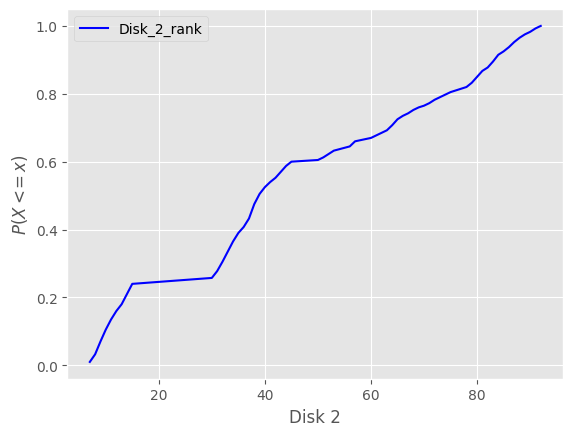

In [14]:
df['Disk_2_rank'] = df['Disk 2'].rank(method = 'average', pct = True)
df.sort_values('Disk 2').plot(x = 'Disk 2', y = 'Disk_2_rank', grid = True, color='blue')
plt.ylabel(r"$P(X <\!\!= x)$")
plt.draw()

<Axes: xlabel='CPU', ylabel='Disk 1'>

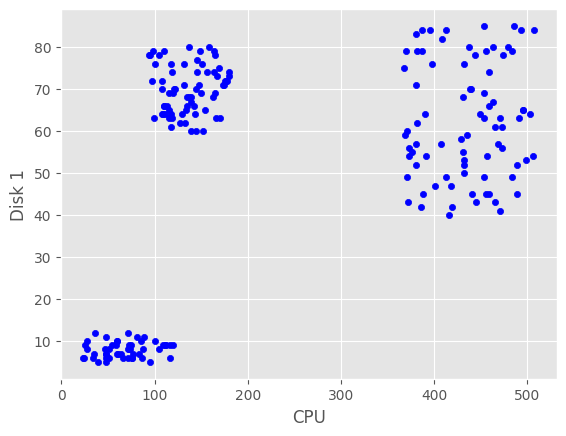

In [ ]:
#Clusters naturais
df.plot.scatter(x='CPU',y='Disk 1',color='blue')

<Axes: xlabel='CPU', ylabel='Disk 1'>

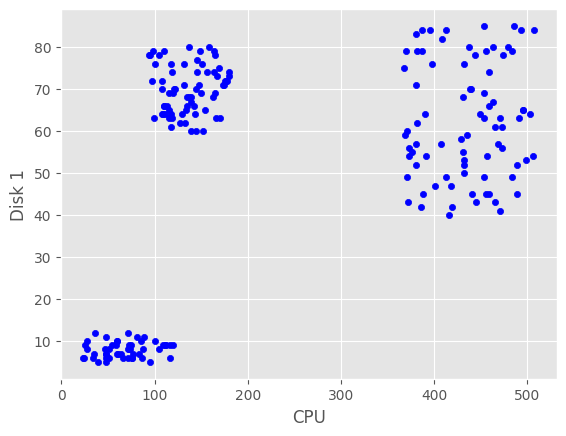

In [15]:
df.plot.scatter(x='CPU',y='Disk 1',color='blue')


<Axes: xlabel='CPU', ylabel='Disk 2'>

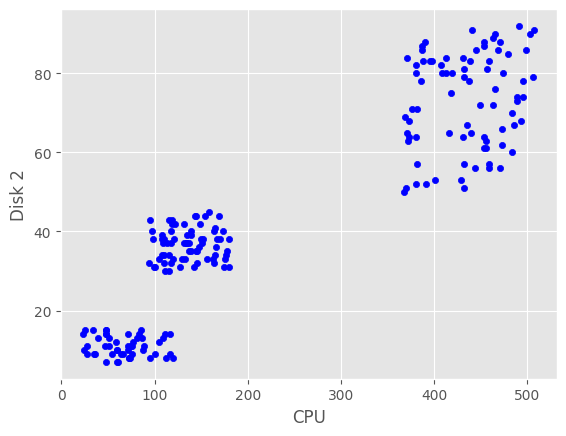

In [16]:
df.plot.scatter(x='CPU',y='Disk 2',color='blue')


<Axes: xlabel='Disk 1', ylabel='Disk 2'>

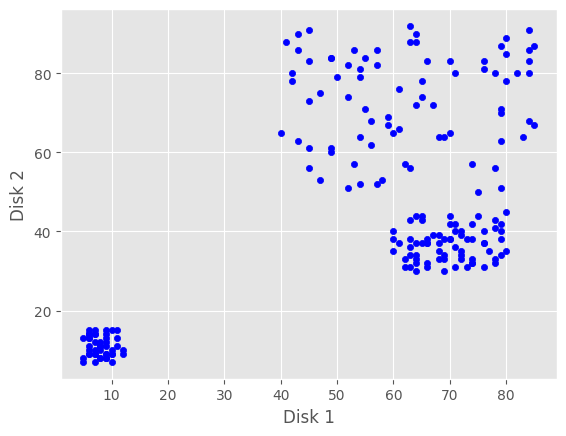

In [17]:
df.plot.scatter(x='Disk 1',y='Disk 2',color='blue')


In [18]:
df['Disk']=df['Disk 1']+df['Disk 2']


<Axes: xlabel='CPU', ylabel='Disk'>

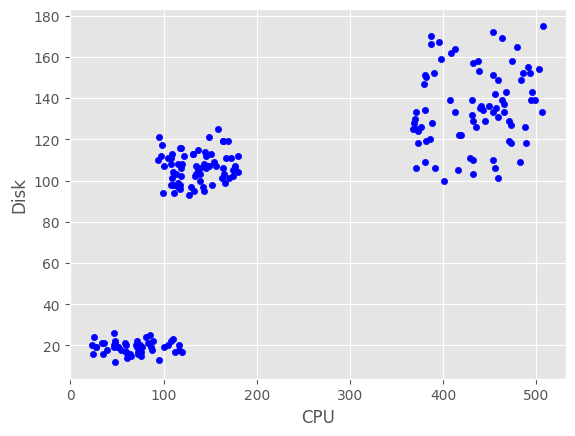

In [19]:
df.plot.scatter('CPU','Disk',color='blue')


In [20]:
df[['CPU','Disk 1','Disk 2']].corr('pearson')

,CPU,Disk 1,Disk 2
CPU,1.000000,0.465376,0.916320
Disk 1,0.465376,1.000000,0.625876
Disk 2,0.916320,0.625876,1.000000


In [21]:
df[['CPU','Disk 1','Disk 2']].corr('spearman')

,CPU,Disk 1,Disk 2
CPU,1.000000,0.452286,0.883539
Disk 1,0.452286,1.000000,0.474939
Disk 2,0.883539,0.474939,1.000000


<Axes: >

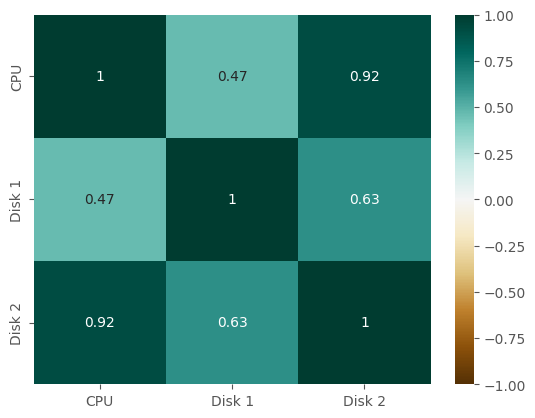

In [23]:
mask = np.triu(np.ones_like(df[['CPU','Disk 1','Disk 2']].corr(), 
                            dtype=np.bool_))
sns.heatmap(df[['CPU','Disk 1','Disk 2']].corr(), mask=None, 
            cmap='BrBG', vmin=-1, vmax=1, annot=True)

Não precisa de transformar os dados e ai podemos usar pearson, caso precisasse usariamos spearman
Mias tempo de cpu mais IO no disk 2


In [24]:
pca = PCA(n_components=3)
X=df[['CPU','Disk 1','Disk 2']].values
pca.fit(X)
X_pca = pca.transform(X)

pca.explained_variance_ratio_

array([0.97670478, 0.02086175, 0.00243347])

In [25]:
np.cumsum(pca.explained_variance_ratio_)


array([0.97670478, 0.99756653, 1.        ])

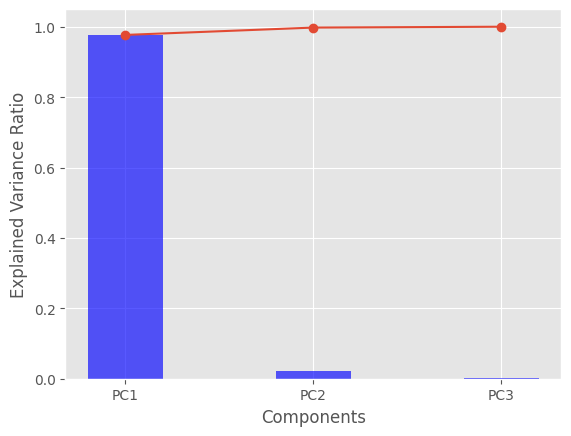

In [26]:
components=['PC1','PC2','PC3']
explain_var_cum=np.cumsum(pca.explained_variance_ratio_)
plt.plot(components, explain_var_cum, marker='o')
plt.bar(components, pca.explained_variance_ratio_, color ='blue',
         width = 0.4, alpha=0.65)
plt.xlabel('Components')
plt.ylabel('Explained Variance Ratio')
plt.draw()

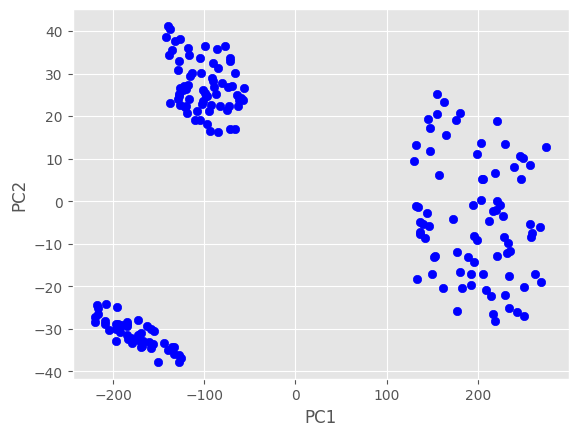

In [27]:
plt.scatter(X_pca[:, 0], X_pca[:, 1],color='blue')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.draw()

In [28]:
scaler = StandardScaler() # Média 0 e Desvio Padrão 1: N(0,1).
scaler.fit(X_pca)
X_scaler = scaler.transform(X_pca)
X_scaler.mean(axis=0)

array([ 1.94289029e-17, -6.98330282e-16,  2.51187959e-17])

In [29]:
np.random.seed(int(time.time()))
rand_number=np.random.randint(2**8)

kmeans = KMeans(n_clusters=3, random_state=rand_number)
# Para realizar a clusterização deve-se utilizar os componentes principais 
# que somam pelo menos 85% da variação explicada
kmeans.fit(X_scaler[:, 0].reshape(-1, 1))

cluster_labels=kmeans.labels_
cluster_labels

array([2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int32)

In [30]:
df['cluster']=cluster_labels
df[['CPU','Disk 1','Disk 2','cluster']]

,CPU,Disk 1,Disk 2,cluster
0,116.824000,9,9,2
1,64.383000,7,9,1
2,35.403000,7,9,1
3,104.409000,8,12,2
4,119.793000,9,8,2
...,...,...,...,...
195,179.784330,74,38,2
196,143.841721,60,35,2
197,139.367790,60,40,2
198,136.997618,68,37,2


In [31]:
df[df.cluster == 0][['CPU','Disk 1','Disk 2','cluster']].describe()


,CPU,Disk 1,Disk 2,cluster
count,80.000000,80.000000,80.000000,80.0
mean,434.191200,62.362500,73.125000,0.0
std,41.893179,13.704147,12.119004,0.0
min,367.807000,40.000000,50.000000,0.0
25%,391.328750,52.000000,64.000000,0.0
50%,437.705000,61.000000,74.500000,0.0
75%,465.952250,76.000000,83.000000,0.0
max,507.450000,85.000000,92.000000,0.0


In [32]:
df[df.cluster == 1][['CPU','Disk 1','Disk 2','cluster']].describe()


,CPU,Disk 1,Disk 2,cluster
count,43.000000,43.000000,43.000000,43.0
mean,60.159023,7.883721,11.000000,1.0
std,20.719566,1.942131,2.507133,0.0
min,23.597000,5.000000,7.000000,1.0
25%,47.327500,6.000000,9.000000,1.0
50%,59.903000,8.000000,11.000000,1.0
75%,75.090000,9.000000,13.000000,1.0
max,100.428000,12.000000,15.000000,1.0


In [33]:
df[df.cluster == 2][['CPU','Disk 1','Disk 2','cluster']].describe()


,CPU,Disk 1,Disk 2,cluster
count,77.000000,77.000000,77.000000,77.0
mean,134.008925,64.246753,34.363636,2.0
std,24.590005,18.591987,8.396285,0.0
min,93.535859,6.000000,8.000000,2.0
25%,113.287489,64.000000,32.000000,2.0
50%,132.745413,69.000000,36.000000,2.0
75%,152.069064,74.000000,39.000000,2.0
max,179.784330,80.000000,45.000000,2.0


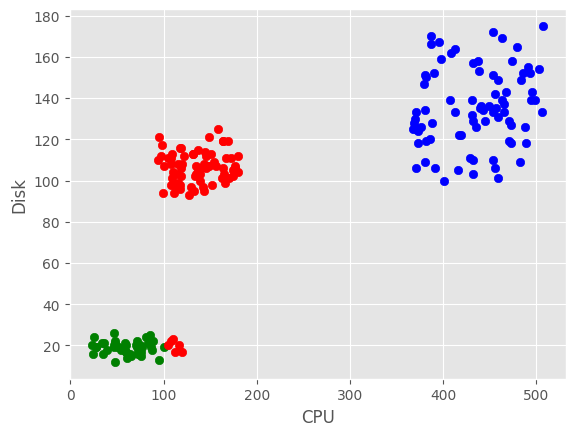

In [34]:
plt.scatter(df[df.cluster == 0]['CPU'].values,
            df[df.cluster == 0]['Disk'].values, color='blue')

plt.scatter(df[df.cluster == 1]['CPU'].values, 
            df[df.cluster == 1]['Disk'].values, color='green')

plt.scatter(df[df.cluster == 2]['CPU'].values,
            df[df.cluster == 2]['Disk'].values, color='red')

plt.xlabel('CPU')
plt.ylabel('Disk')
plt.draw()

In [35]:
lsilhouette=[]
lknumber=range(2,19)
for k in lknumber:
    # SEMENTE de número aleatório
    np.random.seed(int(time.time()))
    rand_number=np.random.randint(2**11)

    # execução do algortimo para cada valor de k
    kmeans = KMeans(n_clusters=k, n_init=rand_number)
    kmeans.fit(X_scaler[:, 0].reshape(-1, 1))
    
    # Rótulos de cada cluster
    cluster_labels=kmeans.labels_
    
    # Cálculo do índice de Silhouette
    silhouette=metrics.silhouette_score(X_scaler, cluster_labels, 
                                        metric='euclidean')
    # armazenando no vetor o valor de cada índice
    lsilhouette.append(silhouette)
    
    print("Rand number = %d, K = %d: %.2f"%(rand_number,k,silhouette))

Rand number = 1740, K = 2: 0.37
Rand number = 1740, K = 3: 0.46
Rand number = 1275, K = 4: 0.38
Rand number = 1843, K = 5: 0.16
Rand number = 644, K = 6: 0.13
Rand number = 644, K = 7: 0.09
Rand number = 1783, K = 8: 0.04
Rand number = 1774, K = 9: 0.02
Rand number = 1598, K = 10: -0.06
Rand number = 1454, K = 11: -0.09
Rand number = 2027, K = 12: -0.09
Rand number = 828, K = 13: -0.08
Rand number = 611, K = 14: -0.10
Rand number = 1600, K = 15: -0.13
Rand number = 774, K = 16: -0.15
Rand number = 853, K = 17: -0.18
Rand number = 625, K = 18: -0.19


Text(0, 0.5, 'Silhouette Index')

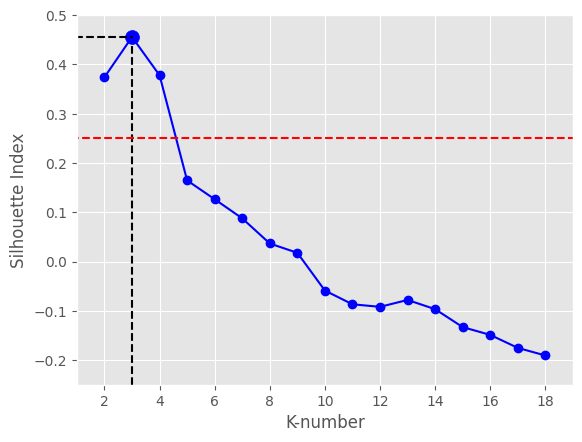

In [36]:
plt.plot(lknumber, lsilhouette, color='blue', ls='-',
         marker='o')

plt.plot([3]*16, np.arange(-0.25, lsilhouette[1], 0.046),
         color='k', ls='--')
plt.plot(np.arange(-0.25, 3.3, 0.3),[lsilhouette[1]]*12, 
         color='k', ls='--')

plt.plot(np.arange(0,20,0.5),[0.25]*40, color='red',ls="--")
plt.scatter(lknumber[1], lsilhouette[1], color='blue', 
            s=100)
plt.xlim(1,19)
plt.ylim(-0.25,0.5)
plt.xlabel('K-number')
plt.ylabel('Silhouette Index')

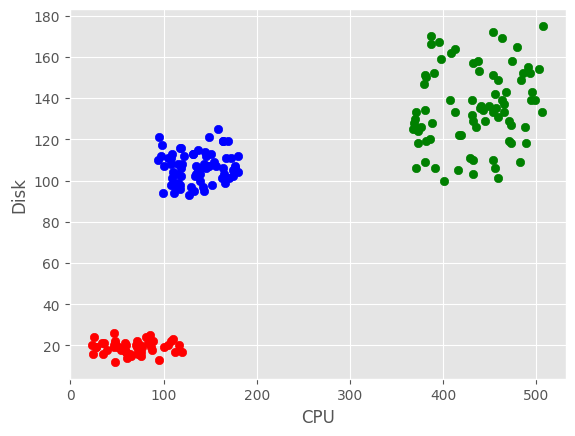

In [37]:
np.random.seed(int(time.time()))
rand_number=np.random.randint(2**8)

kmeans = KMeans(n_clusters=3, random_state=rand_number)
kmeans.fit(X_scaler)# X_scaler[:, 0].reshape(-1, 1)

cluster_labels=kmeans.labels_
cluster_labels

df['cluster']=cluster_labels

plt.scatter(df[df.cluster == 0]['CPU'].values,
            df[df.cluster == 0]['Disk'].values, color='blue')

plt.scatter(df[df.cluster == 1]['CPU'].values, 
            df[df.cluster == 1]['Disk'].values, color='green')

plt.scatter(df[df.cluster == 2]['CPU'].values,
            df[df.cluster == 2]['Disk'].values, color='red')

plt.scatter(df[df.cluster == 3]['CPU'].values,
            df[df.cluster == 3]['Disk'].values, color='orange')

plt.xlabel('CPU')
plt.ylabel('Disk')
plt.draw()